# The Linear Regression Model

Similar to the perceptron, the linear regression model also relies on an input vector and bias term, a series of weights, and an activation function. In this file, we will focus on the notable differences between the models.

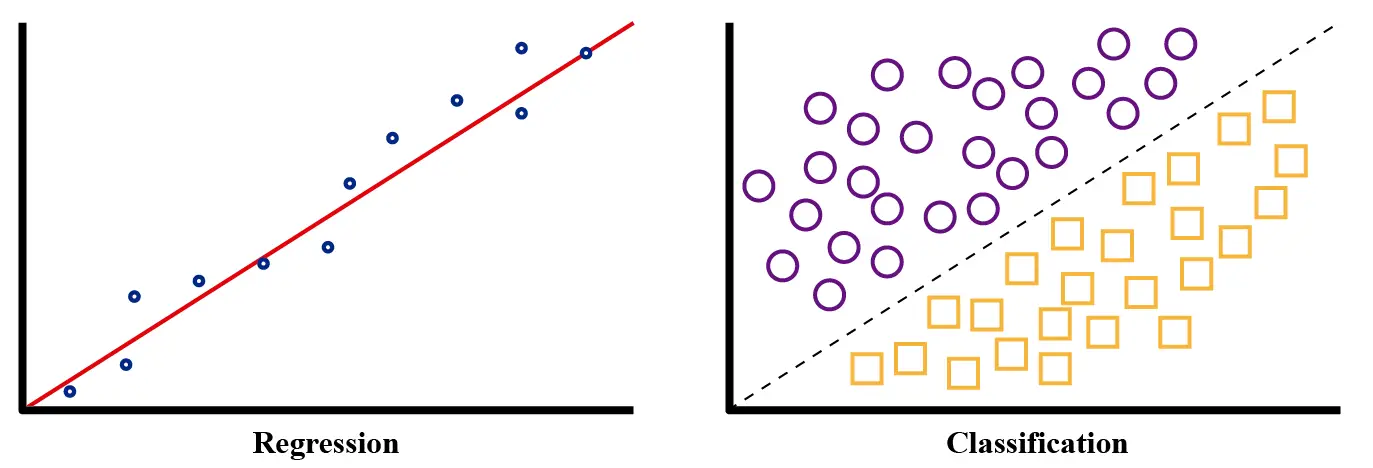


## The differences

We will now use an activation function that is continuous and differentiable, such as the identity function, $f(z) = z$. This is necessary in order to use stochastic gradient descent, which will help us to minimize the error.

The new error function is : $$C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. $$
This is an MSE function, where N is the size of our dataset, $$\hat{y}^{(i)}$$ is our prediction, and $$y^{(i)}$$ is the actual value. Advantages to the using MSE include the fact that squaring the error emphasizes larger mistakes, which helps push the model to avoid large deviations. Additionally, MSE is convex, so there's only one global minimum, and gradient descent is guaranteed to converge (assuming a decent learning rate). Below is some simple mock data and a plot, designed to show the convexity of the MSE function.

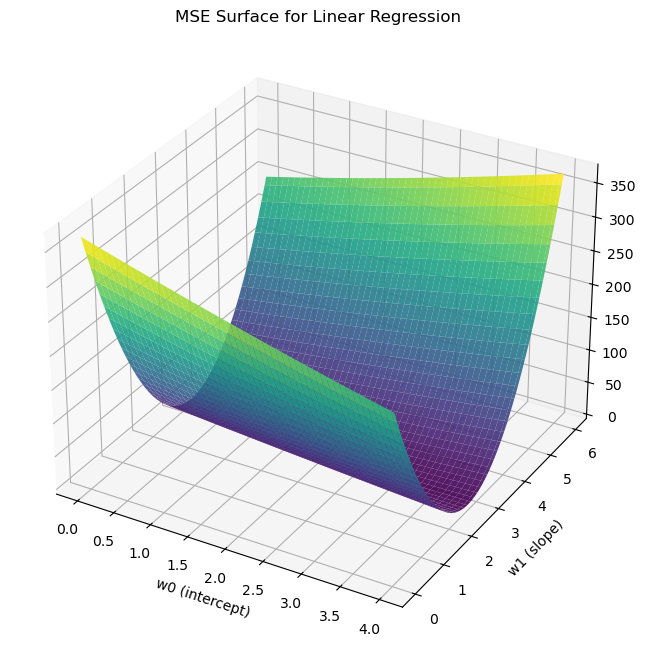

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulated data
x = np.linspace(0, 10, 50)
true_w0, true_w1 = 2, 3
y = true_w0 + true_w1 * x + np.random.normal(0, 1, size=x.shape)

# Create grid of weight values
w0_vals = np.linspace(0, 4, 100)
w1_vals = np.linspace(0, 6, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Compute MSE for each (w0, w1) pair
def compute_mse(w0, w1, x, y):
    y_pred = w0 + w1 * x[:, np.newaxis, np.newaxis]
    mse = ((y_pred - y[:, np.newaxis, np.newaxis])**2).mean(axis=0)
    return mse

MSE = compute_mse(W0, W1, x, y)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W0, W1, MSE, cmap='viridis', alpha=0.9)
ax.set_xlabel('w0 (intercept)')
ax.set_ylabel('w1 (slope)')
ax.set_title('MSE Surface for Linear Regression')
plt.show()

## The dataset

I used the same palmer penguins dataset, however in this model, I constrained the data to all of the Adelie penguins (the first 152 specimens).This ensures that we can examine the realationship between flipper length and body mass, without any confounding factors, such as species.

Further, because this data consists of 4 different measurements per penguin, I implemeted a heat map of the correlation coefficients in order to find the most highly correlated variables.

Lastly, I normalized the data using the equation:
$$\Large Z = \dfrac{\bar{X} - \mu}{\sigma}$$
This was needed because of the large values present in the dataset. This process allows us to maintain the shape and behavior of the data, while preventing certain operations, such as multiplication or exponentiation to drive our numbers towards infinity (and causing an overflow error).

## Packages

In addition to the previous packages I also used:

- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)